In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# dataset
df = pd.read_csv("input/divorce.csv")

In [3]:
# data exploration 
display(df)

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [4]:
# statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sorry_end,170.0,1.776471,1.627257,0.0,0.0,2.0,3.0,4.0
Ignore_diff,170.0,1.652941,1.468654,0.0,0.0,2.0,3.0,4.0
begin_correct,170.0,1.764706,1.415444,0.0,0.0,2.0,3.0,4.0
Contact,170.0,1.482353,1.504327,0.0,0.0,1.0,3.0,4.0
Special_time,170.0,1.541176,1.632169,0.0,0.0,1.0,3.0,4.0
No_home_time,170.0,0.747059,0.904046,0.0,0.0,0.0,1.0,4.0
2_strangers,170.0,0.494118,0.898698,0.0,0.0,0.0,1.0,4.0
enjoy_holiday,170.0,1.452941,1.546371,0.0,0.0,1.0,3.0,4.0
enjoy_travel,170.0,1.458824,1.557976,0.0,0.0,1.0,3.0,4.0
common_goals,170.0,1.576471,1.421529,0.0,0.0,2.0,3.0,4.0


In [5]:
# preprocessing data to see if they are any missing values
df.isna().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [6]:
# the labels : select the X and y values 
Y = df.Divorce_Y_N
X = df.drop(['Divorce_Y_N'],axis=1)

In [7]:
# splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [8]:
# Predicting Divorce using KNeighbors Classifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
# predict the labels of the data values : classe for X_test
Y_pred = neigh.predict(X_test)

Classification report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        29

    accuracy                           0.98        57
   macro avg       0.98      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57

Accuracy: 98.24561403508771 %


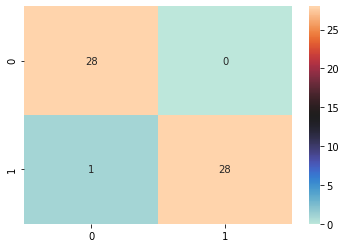

In [10]:
# build a text report showing the main classification metrics
print("Classification report")
print(classification_report(Y_test, Y_pred))
# print the accuracy classification score
acc = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {acc*100} %")
# compute confusion matrix to evaluate the accuracy of a classification
CM = confusion_matrix(Y_test, Y_pred)
# plot the confusion matrix 
sns.heatmap(CM, annot=True,cmap="icefire")
plt.show()